In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/Day10/TrainData.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/Day10/TrainLabel.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/Day10/TestData.csv') 
y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/Day10/TestLabel.csv')

X_train = X_train.iloc[:,1:].values
print(X_train.shape)
y_train = y_train.iloc[:,:].values
print(y_train.shape)
X_test = X_test.iloc[:,1:].values
print(X_test.shape)
y_test = y_test.iloc[:,:].values
print(y_test.shape)

(2140, 3780)
(2140, 1)
(710, 3780)
(710, 1)


In [3]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

def PCASVM(nc):
  pca = PCA(nc)
  X_train_lower = pca.fit_transform(X_train)
  # print(pca.n_components_)
  n_components = pca.n_components_
  PCA_test = PCA(n_components)
  X_test_lower = PCA_test.fit_transform(X_test)
  X_test_lower.shape
  model = SVC(kernel = 'rbf', random_state = 0)
  model.fit(X_train_lower, y_train)
  y_pred = model.predict(X_test_lower)
  return y_pred

In [14]:
from sklearn.metrics import confusion_matrix, f1_score
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

nc = np.arange(0.6, 1, 0.05)
f1_sc = []
Accuracy = []
num = 0.9
y_pred = PCASVM(num)
count = 0
for i in range(len(y_pred)):
  if y_pred[i] == y_test[i]:
    count += 1

accuracy = count/len(y_pred)
Accuracy.append(accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
f1_sc.append(f1)

print(accuracy)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5366197183098591


In [5]:
print(f1_sc)

[0.5075639257185254, 0.5272048759604828, 0.5524463418809507, 0.5482261181795789, 0.5487978618915501, 0.5402762135624253, 0.5384442442621846, 0.5437733445060057]


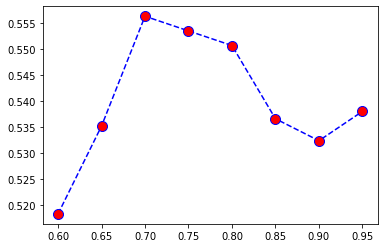

In [6]:
import matplotlib.pyplot as plt

plt.plot(nc, Accuracy, color ='blue',linestyle ='dashed', marker ='o',markerfacecolor ='red', markersize = 10)


In [7]:
pca = PCA(6)
X_train_lower = pca.fit_transform(X_train)

n_components = pca.n_components_
PCA_test = PCA(n_components)
X_test_lower = PCA_test.fit_transform(X_test)
X_test_lower.shape
model = SVC(kernel = 'linear', random_state = 0)
model.fit(X_train_lower, y_train)
y_pred = model.predict(X_test_lower)

count = 0
for i in range(len(y_pred)):
  if y_pred[i] == y_test[i]:
    count += 1

accuracy = count/len(y_pred)
print(accuracy)

0.423943661971831


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

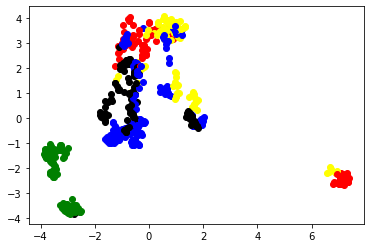

In [15]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 10)
    y = np.linspace(ylim[0], ylim[1], 10)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.figure
for i in range(len(y_pred)):
  if y_pred[i] == 1:
    plt.scatter(X_test_lower[i,0],X_test_lower[i,1],color='red')
  elif y_pred[i] == 2:
    plt.scatter(X_test_lower[i,0],X_test_lower[i,1],color='yellow')
  elif y_pred[i] == 3:
    plt.scatter(X_test_lower[i,0],X_test_lower[i,1],color='black')
  elif y_pred[i] == 4:
    plt.scatter(X_test_lower[i,0],X_test_lower[i,1],color='blue')
  else:
    plt.scatter(X_test_lower[i,0],X_test_lower[i,1],color='green')


plot_svc_decision_function(model)

plt.title('SVM')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()
